### Package Installation

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import tensorflow as tf
from tensorflow import keras
from keras import layers

from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential


2023-08-03 16:26:55.879317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 16:26:56.576181: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-08-03 16:26:56.576260: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-08-03 16:26:56.576266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

### EDA

In [ ]:
#read dataset
seq = pd.read_csv('event_seqs.csv',header=None, delimiter=',', sep=',')
seq.head()


In [ ]:
tval = seq.values
tval.shape

<Axes: xlabel='0'>

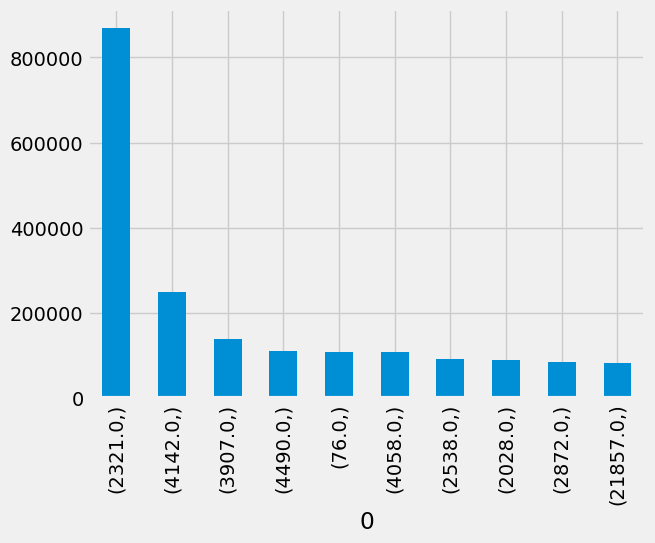

In [12]:
#EDA
seq_np = np.array(seq)
seq_f = seq_np.reshape(-1)
seq_df = pd.DataFrame(seq_f)
top = seq_df.value_counts().head(10)
top.plot(kind='bar')

In [6]:
#number of unique categories
seq_df.nunique()

0    6345
dtype: int64

### Split Dataset into n-item sequences

In [ ]:
#function to apply n-item sliding window
def splitSequence(seq, n_steps):
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        result = [int(i) for i in seq[i][0].split(',')]  
        for j in range(len(result)):
        #if lastIndex is greater than length of sequence then break
            lastIndex = j + n_steps
            if lastIndex > len(result) - 1:
                break
            
            #Create input and output sequence
            seq_X, seq_y = result[j:lastIndex], result[lastIndex]
            
            #append seq_X, seq_y in X and y list
            X.append(seq_X)
            y.append(seq_y)
            pass

    X = np.array(X)
    y = np.array(y)
    return X,y 

In [ ]:
#make 10-item seq
n_steps = 10
X, y = splitSequence(tval, n_steps = n_steps)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
X_df.shape

In [ ]:
# save dataframe to csv, reuse later 
X_df['y'] = y_df
X_df.to_csv('seq10.csv')

In [ ]:
#make 5-item seq
n_steps = 5
X, y = splitSequence(tval, n_steps = n_steps)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
X_df.shape


In [ ]:
# save dataframe to csv, reuse later
X_df['y'] = y_df
X_df.to_csv('seq5.csv')